## Abalone Case Study

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings.The number of rings is our target variable.
I have collected this data from UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/abalone).

Importing numpy and pandas libraries for data operations.matplotlib and seaborn for visualization purpose and sklearn libraries for modelling process.

In [1]:
#importing the required libraries and metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
#accesing the dataset from the file in the device
a=pd.read_csv('C:/Users/hp/Downloads/Github/Repository/abalone.csv')
ab=pd.DataFrame(a)

In [3]:
#check for structure of the data table
ab.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Lets check whether there are null values or not
ab.isnull().sum()
#so there is no null values in the dataset

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
#conversion of categorical column in binary form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ab['Sex']=le.fit_transform(ab['Sex'])

In [6]:
#check for the datatype of various columns
ab.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
#verifying for the skewness in the values
ab.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [8]:
#handling skew more than 0.55 in all columns
for col in ab.columns:
    if ab[col].skew()>0.55:
        ab[col]=np.log1p(ab[col])
    if ab[col].skew()<-0.55:
        ab[col]=np.square(ab[col])

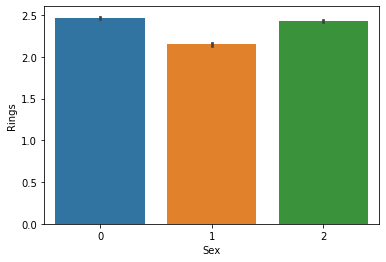

In [9]:
#plotting barplot to see the ratio of variation on sex wrt to rings
sns.barplot(x='Sex',y='Rings',data=ab)

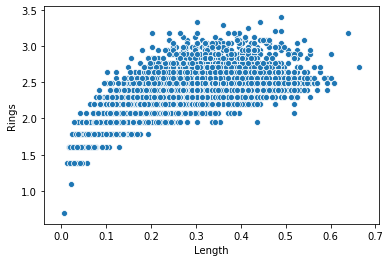

In [10]:
#plotting scatterplot b/w length and rings
sns.scatterplot(x='Length',y='Rings',data=ab)

In [11]:
#check for correlation
abcor=ab.corr()
abcor

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.035003,-0.038494,-0.041791,-0.021391,-0.006385,-0.033027,-0.035056,-0.032130
Length,-0.035003,1.000000,0.982891,0.850669,0.956884,0.949391,0.943741,0.937659,0.611351
Diameter,-0.038494,0.982891,1.000000,0.855794,0.956298,0.942748,0.938694,0.945047,0.626382
Height,-0.041791,0.850669,0.855794,1.000000,0.846682,0.824234,0.838257,0.860933,0.647998
Whole weight,-0.021391,0.956884,0.956298,0.846682,1.000000,0.971167,0.967569,0.957923,0.593553
Shucked weight,-0.006385,0.949391,0.942748,0.824234,0.971167,1.000000,0.940721,0.902684,0.518154
Viscera weight,-0.033027,0.943741,0.938694,0.838257,0.967569,0.940721,1.000000,0.920699,0.579620
Shell weight,-0.035056,0.937659,0.945047,0.860933,0.957923,0.902684,0.920699,1.000000,0.681678
Rings,-0.032130,0.611351,0.626382,0.647998,0.593553,0.518154,0.579620,0.681678,1.000000


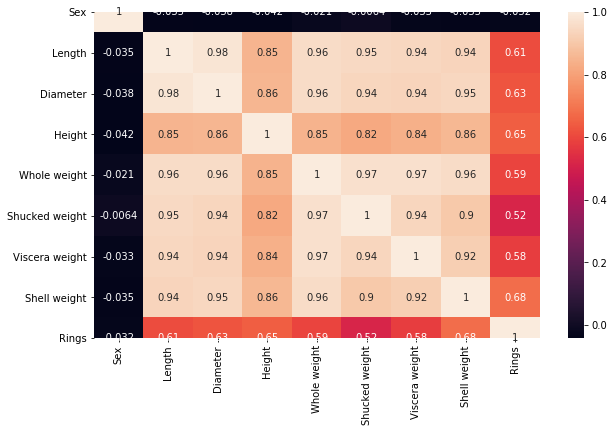

In [12]:
#plotting the correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(abcor,annot=True)

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

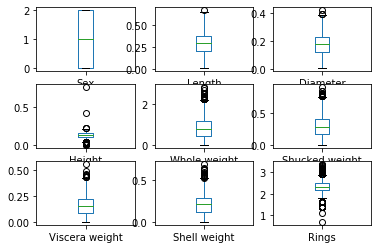

In [13]:
#boxplot for each columns
ab.plot(kind='box',subplots=True,layout=(3,3))

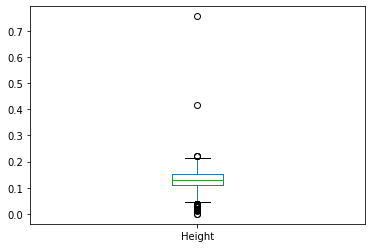

In [14]:
#from the above,we find out height column has maximum outliers
#lets plot it seperately
ab['Height'].plot.box()

In [15]:
#importing zscore to handle outliers
from scipy.stats import zscore
z=np.abs(zscore(ab))

In [16]:
#getting a new dataset after applying zscore to original datset
ab_new=ab[(z<3).all(axis=1)]

In [17]:
#check for the shape of dataset
ab.shape

(4177, 9)

In [18]:
#shape of dataset after applying zscore
ab_new.shape

(4110, 9)

In [19]:
#from above two executions,it is clear that there is more than 100 outliers which is removed
#So we take new dataset as our primary
ab=ab_new

In [20]:
#Lets describe the data to get statistical glance
ab.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000,4110.000000
mean,1.051338,0.287889,0.175435,0.129704,0.818644,0.291904,0.160546,0.206067,2.351501
std,0.821968,0.114957,0.073937,0.032861,0.469069,0.153681,0.088539,0.105967,0.275043
min,0.000000,0.016900,0.009025,0.024693,0.010500,0.004988,0.000500,0.003494,1.609438
25%,0.000000,0.202500,0.122500,0.108854,0.443125,0.171008,0.089384,0.122218,2.197225
50%,1.000000,0.297025,0.180625,0.131028,0.795750,0.288557,0.157004,0.207217,2.302585
75%,2.000000,0.378225,0.230400,0.152721,1.142000,0.404047,0.222743,0.281412,2.484907
max,2.000000,0.600625,0.366025,0.223144,2.273000,0.768487,0.432432,0.536493,3.178054


So,from the describe column,we observe that the range b/w min and max values is normal and standard deviation is also not so high.So,data is ready for the process 

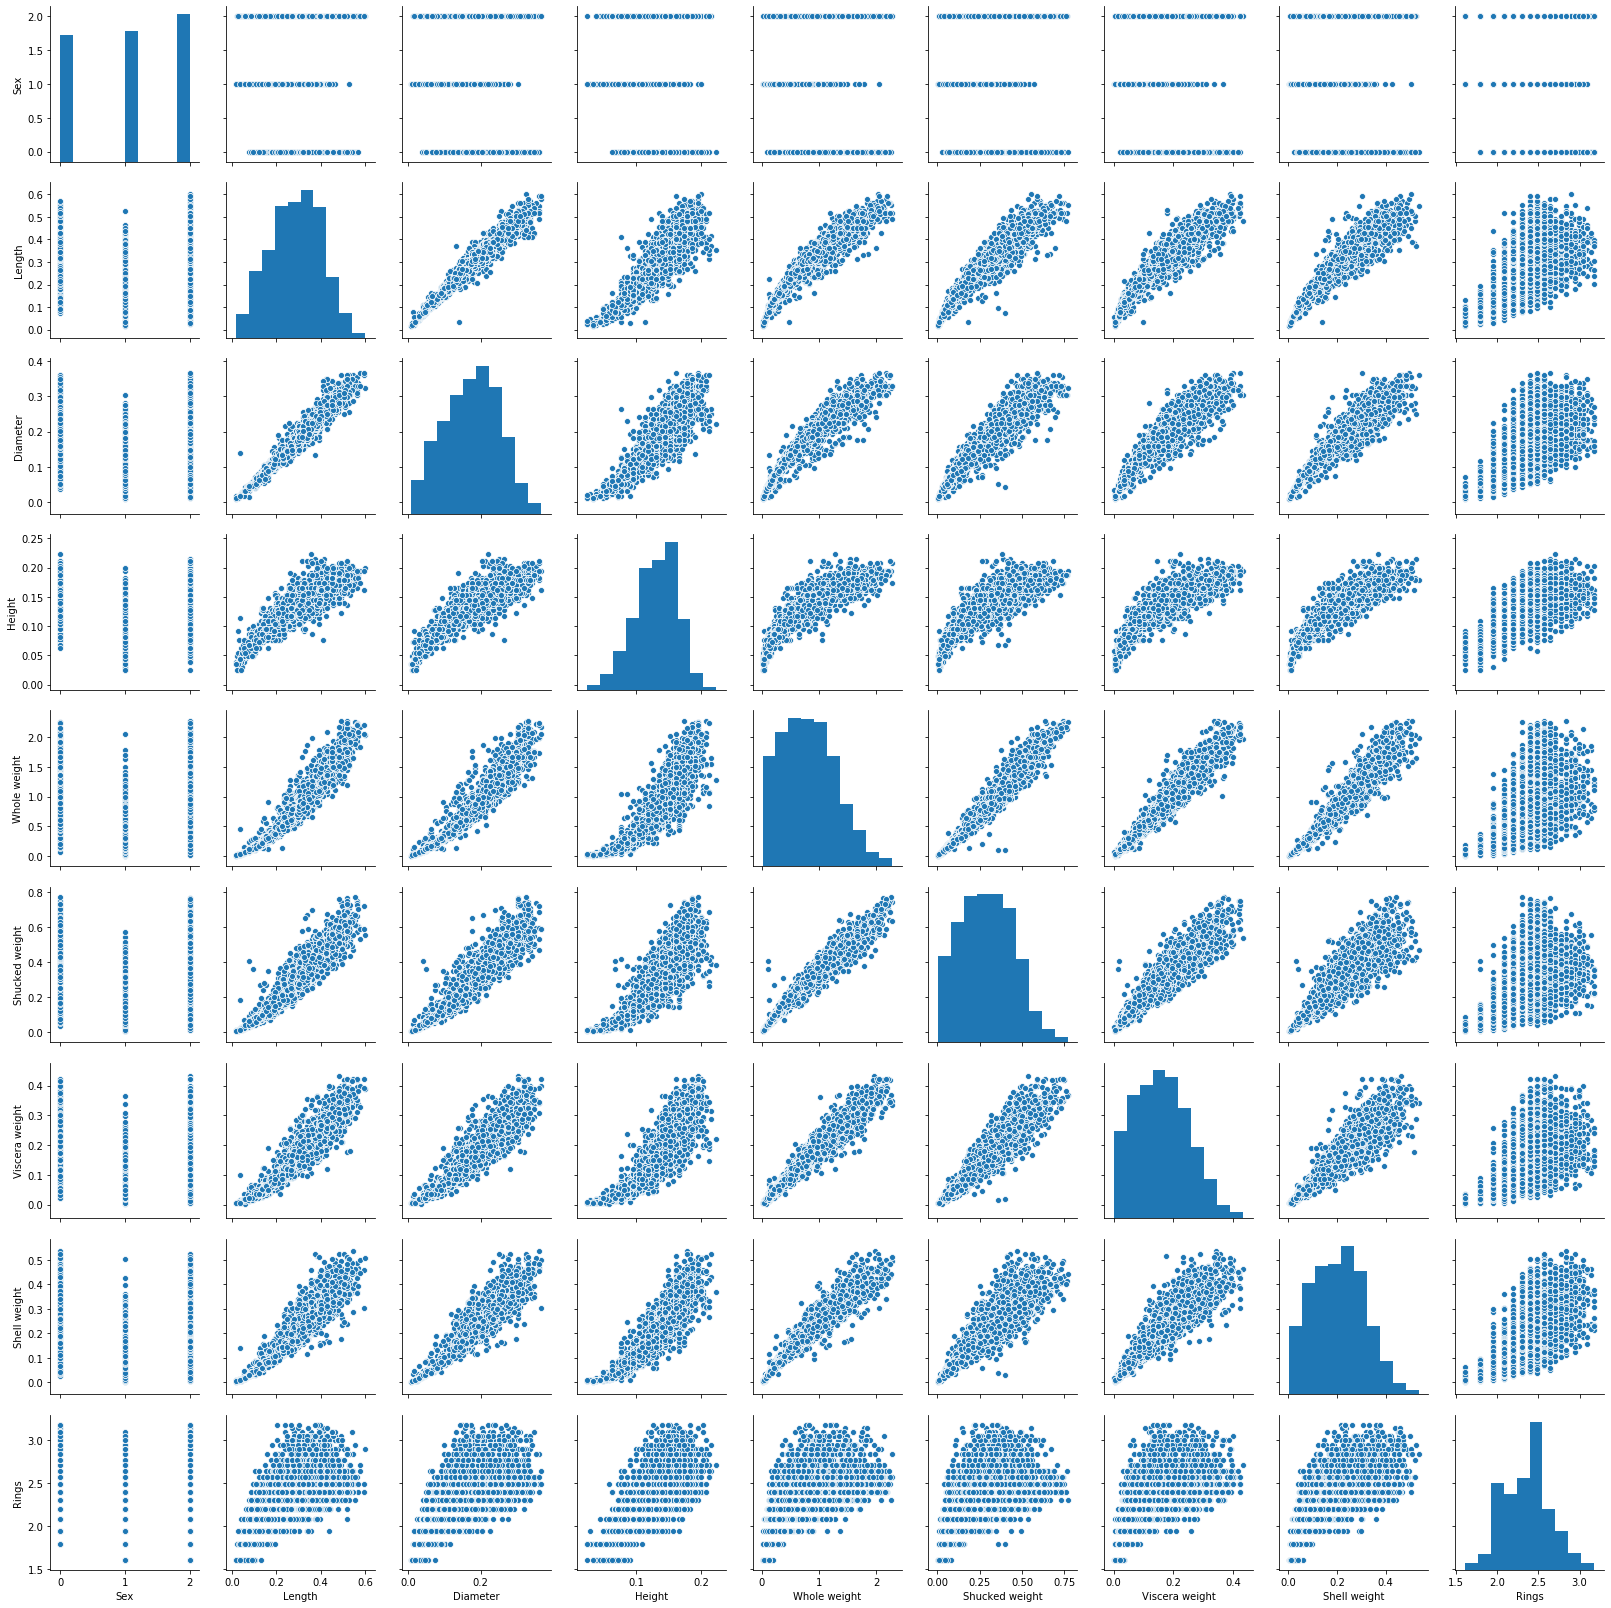

In [21]:
#plotting the pairplot of whole data columns
sns.pairplot(ab)

Shaping the data for machine learning process

In [22]:
#seperating the input and output variables
x=ab.drop(['Rings'],axis=1)
y=ab['Rings']

In [23]:
#defining a function to evaluate random_state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [24]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [25]:
#defining a function for algorithm operations and metrics evaluation
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    print('mean_absolute_error',mean_absolute_error(y_test,pred))
    print('r2_score',r2_score(y_test,pred))

In [26]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

In [27]:
#implying linear regression 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.5563084126765261 at 85


In [28]:
#checking for the cross_val_score
cross_val(lm)

[0.42685103 0.3480442  0.53813033 0.54413198 0.50362375]
mean_score= 0.4721562596684514
standard deviation 0.07480595194853154


In [29]:
#implying decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.21369907499609653 at 89


In [30]:
cross_val(dtr)

[ 0.20564477 -0.16550216  0.18572755  0.14355721  0.10009574]
mean_score= 0.09390462294016574
standard deviation 0.1346943946627464


In [31]:
#implying k-neighbors
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()


#lets use gridsearchcv to get best n_neighbors
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters) 
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 12}

In [32]:
knr=KNeighborsRegressor(n_neighbors=12)
random(knr)

0.6093086465725326 at 87


In [33]:
cross_val(knr)

[0.43937961 0.47037968 0.55890659 0.60690012 0.60279339]
mean_score= 0.5356718772935054
standard deviation 0.06878064177462022


In [34]:
#Implying support vector machine
from sklearn.svm import SVR
svm=SVR()
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}

#applying gridsearchcv for best kernel
grd=GridSearchCV(svm,parameters)
grd.fit(x,y)
print(grd.best_score_)
print(grd.best_params_)

0.6128380219393558
{'C': 100, 'kernel': 'rbf'}


In [35]:
svm=SVR(kernel='rbf')
random(svm)

0.6042504555489072 at 50


In [36]:
#implying random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [37]:
#getting the random_state using function declared above
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.6173034580639081 at 83


In [38]:
cross_val(rfr)

[0.52058053 0.42739135 0.57967178 0.60010745 0.57534653]
mean_score= 0.5406195258919525
standard deviation 0.0624372291306956


From all the above algorithms,we get highest score of 0.61 at random_state of 83 from random forest regressor
so take the Random forest as the final algorithm

In [39]:
#check for the algorithm operations and metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=83)
model(rfr)

score= 0.9444193369278945
mean_squared_error 0.028679583093682473
mean_absolute_error 0.12921988988858238
r2_score 0.628497478262289


In [40]:
#saving the model using joblib
from sklearn.externals import joblib
joblib.dump(rfr,'abalone_rfr.pkl')

['abalone_rfr.pkl']

## Conclusion

After importing the data to the dataframe,I checked for the null values.Changed the categorical columns into labels.Checked for the skewed values in data and adjusted it.I get the insights of the data by analysing various plots among features.I used zscore to handle the outliers and get the statistical summary using describe.Then I shaped the data for modelling and starts applying the algorithm one by one.Random Forest Regressor is the best fit algorithm for this data.